StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=87.0.4280.88)


In [115]:
page = int(driver.find_element_by_class_name('paginate').text.split(' ')[-1])

AttributeError: 'str' object has no attribute 'click'

In [169]:
# import
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from glob import glob
from bs4 import BeautifulSoup
# import url
from urllib.parse import urlparse
import requests
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
from konlpy.tag import Okt
import nltk
from tqdm import tqdm_notebook


In [185]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from konlpy.tag import Okt
import nltk

In [186]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()

okt = Okt()
text = []
for i in range(1,10):
    driver.get('https://sports.news.naver.com/index.nhn')
    time.sleep(0.5)
    driver.find_elements_by_class_name('link_main_menu')[i].click()
    time.sleep(0.5)
    driver.find_element_by_link_text('최신뉴스').click()
    time.sleep(0.5)
    old_pg = driver.current_url
    driver.get(old_pg+'&page='+'500')
    time.sleep(0.5)
    page = driver.find_element_by_class_name('paginate').find_element_by_css_selector('strong').text
    driver.get(old_pg)
    time.sleep(0.5)
    for k in range(1, int(page)+1):
        driver.get(driver.current_url+'&page='+str(k))
        time.sleep(0.5)
        tmp = driver.find_element_by_class_name('news_list').find_elements_by_class_name('title')
        for line in tmp:
            text.append(line.text)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=87.0.4280.88)


In [181]:
text

시상 수상',
 "손흥민 푸스카스상, 레반도프스키는 FIFA '올해의 선수' 수상",
 '레반도프스키, 메시-호날두 아성 깨고 첫 FIFA 올해의 선수',
 "'번리전 70ｍ 원더골' 손흥민, 2020 푸스카스상 수상",
 '후보 노미네이트도, 수상도 처음…손흥민, 토트넘의 자랑으로',
 '\'韓 최초 푸스카스상 수상\' SON, "이 기억 절대 잊지 못할 겁니다"',
 '손흥민 "매우 특별한 골" 푸스카스상 수상 소감',
 "'번리전 원더골' 손흥민, FIFA 푸슈카시상 수상…한국인 최초(종합)",
 "'난 너 찍었는데'…레반도프스키에 외면당한 호날두",
 "'래시포드 멀티골' 맨유, 난타전 끝에 셰필드 3-2 제압…6위 도약",
 '손흥민 푸스카스상…"평생 못 잊을, 특별한 밤"',
 '\'푸스카스상 수상\' 손흥민 "정말 놀랍고 특별한 골이었다"',
 '선두 등극 리버풀, 크리스탈팰리스전 6연승 도전',
 '‘손흥민 아시아 두 번째’ 푸스카스상 역대 수상자는?',
 '호날두·네이마르·즐라탄처럼…푸스카스상 수상 손흥민, 월드클래스 인증',
 '솔샤르, 치명적 실수에도 헨더슨 감싸..."배우고 성숙해질 시험이라 생각"',
 '레반도프스키, 올해 최고 선수로 등극, 메날두 체제 균열냈다',
 '[아침에 한 장] 손흥민, 韓 최초 푸스카스상 수상',
 '\'손흥민 푸스카스상\'에 옛 동료 베르통언 "다 내 도움 덕분이야"',
 '\'무버지\' 무리뉴의 축하 "시즌 최고의 골 푸스카스, 당연히 쏘니"',
 "레반도프스키, FIFA '올해의 선수' 수상…'메날두' 눌렀다",
 '손흥민 ‘푸스카스상 수상’ 영광… ‘전문가 투표’서 이겼다',
 "[TF초점] '번리전 70m 원더골' 손흥민, 2020 FIFA 푸스카스상 수상 의미",
 "'70m 원더골' 손흥민, FIFA 푸슈카시상 수상..한국 선수 최초",
 '푸스카스상 받은 손흥민 "다시 본 뒤 특별한 골이라 생각"',
 '손흥민 ‘번리전 70m 원더골’ EPL 넘어 세계 최고 골 우뚝',
 "손흥민, '70m 폭

In [182]:
present_text = ''
for each_line in text:
    present_text = present_text + each_line + '\n'

In [183]:
file = open('static/data/wc.txt', 'w',encoding='utf-8')
file.write(present_text) 
file.close() 

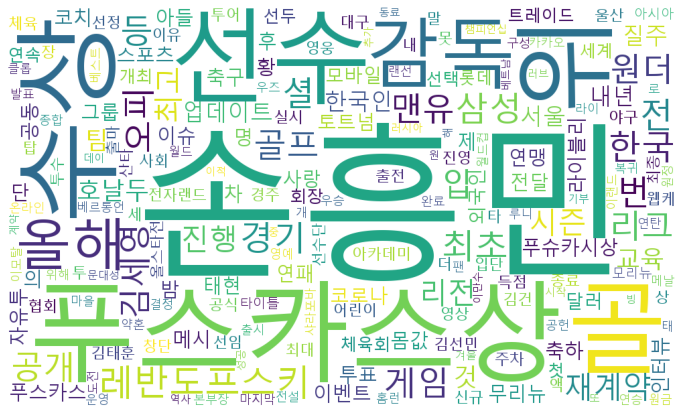

In [184]:
tokens_ko = okt.nouns(present_text)
ko = nltk.Text(tokens_ko)
from wordcloud import WordCloud
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()